# [Bar Charts and Heatmaps](https://www.kaggle.com/code/alexisbcook/bar-charts-and-heatmaps)
## Bar Plots
### Core Lesson

In [3]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import random as rd

# Import prepped data
lap_times  = pd.read_csv('./intermediate/lap_times_prepped.csv')
pit_stops  = pd.read_csv('./intermediate/pit_stops_prepped.csv')
qualifying = pd.read_csv('./intermediate/qualifying_prepped.csv')
results    = pd.read_csv('./intermediate/results_prepped.csv')

/var/folders/0p/fnlsdkq159s9phmzxxmms5pc0000gn/T/ipykernel_48458/1033431768.py:10: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  lap_times  = pd.read_csv('./intermediate/lap_times_prepped.csv')


`seaborn` bar charts use the `barplot` function, where the data-frame to be plotted is specified in the data argument, and aesthetics are then assigned to attributes such as `x`, `y`, `hue`, etc.

If we were to plot median lap times for a subset of drivers over a range of circuits; this is how we'd do it.

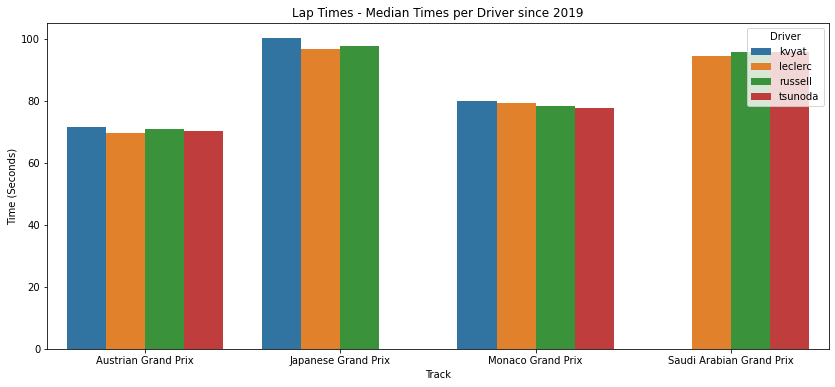

In [38]:
driver_subset = rd.sample(lap_times[lap_times.year >= 2019]['driverRef'].unique().tolist(), 4)
track_subset  = rd.sample(lap_times[lap_times.year >= 2019]['name'].unique().tolist(), 4)

median_lap_time = (
    lap_times.loc[
        (lap_times.driverRef.isin(driver_subset)) &
        (lap_times.name.isin(track_subset))
    ]
    .groupby(['name', 'driverRef'])
    .milliseconds
    .median()
    .reset_index()
)

median_lap_time['seconds'] = median_lap_time['milliseconds'] / 1000

# Plot
plt.figure(figsize = (14, 6))
plt.title("Lap Times - Median Times per Driver since 2019")

sns.barplot(data = median_lap_time, x = 'name', y = 'seconds', hue = 'driverRef')

plt.legend(title = 'Driver', loc = 'upper right')
plt.xlabel('Track')
plt.ylabel('Time (Seconds)')
plt.pause(0.1)
plt.close()

### Further Exploration

Deviating from the Kaggle course a little bit, `catplot` (a more general plotting function that allows access to multiple types of charts showing relationships between numerical and categorical variables - a cousin of `relplot`) allows you to use facets (`FacetGrid`) in your bar plot.

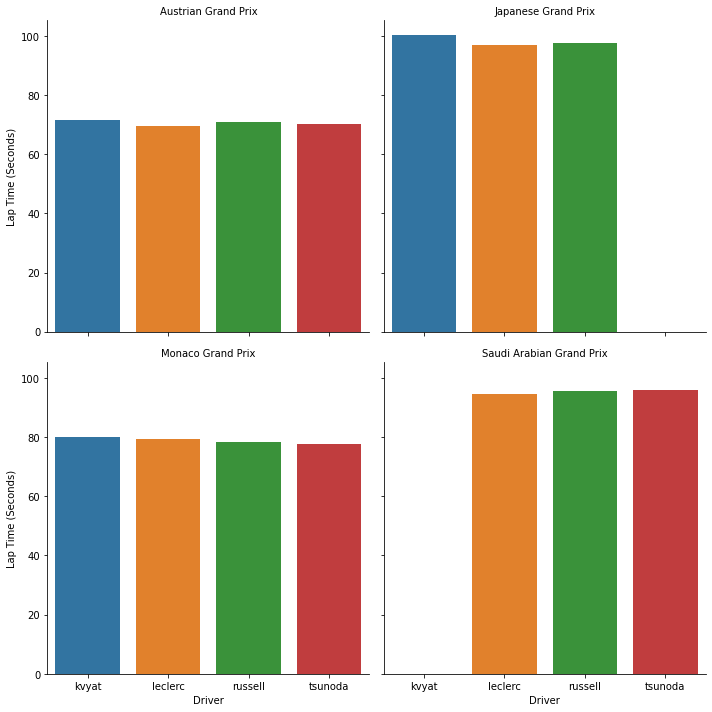

In [82]:
# Plot
catplot_example = sns.catplot(
    data = median_lap_time, 
    x = 'driverRef', y = 'seconds', 
    col = 'name', 
    kind = 'bar',
    col_wrap = 2
)

(
    catplot_example
        .set_xlabels('Driver', fontsize = 10)
        .set_ylabels('Lap Time (Seconds)', fontsize = 10)
        .set_titles("{col_name}")
)

## Heat Maps
To visualise how lap times evolved over the first few laps of a given race, we'd do this:

Text(105.0, 0.5, 'Lap Times (Seconds)')

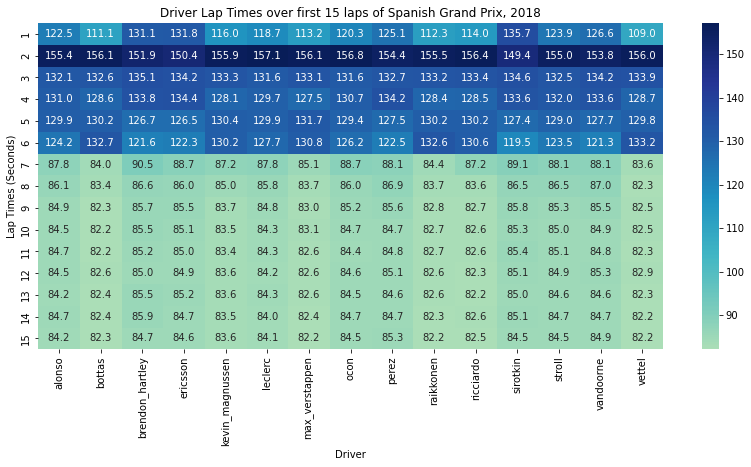

In [83]:
track_subset  = rd.sample(lap_times[lap_times.year == 2018]['name'].unique().tolist(), 1)[0]

lap_times_wrk = lap_times.loc[
    (lap_times.name == track_subset) &
    (lap_times.lap <= 15) &
    (lap_times.year == 2018)
]

driver_subset = rd.sample(lap_times_wrk['driverRef'].unique().tolist(), 15)

lap_times_wrk = lap_times_wrk[lap_times_wrk.driverRef.isin(driver_subset)]
lap_times_wrk['seconds'] = lap_times_wrk['milliseconds'] / 1000
lap_times_plt = lap_times_wrk[['lap', 'driverRef', 'seconds']].pivot('lap', 'driverRef', 'seconds')

# Plot
plt.figure(figsize = (14, 6))
plt.title(f"Driver Lap Times over first 15 laps of {track_subset}, 2018")

sns.heatmap(
    data = lap_times_plt, # Data needs to be pivoted first (see above)
    cmap = "YlGnBu", # Change colour map
    annot = True, # Show numerical values in each tile
    fmt = ".1f", # Formatting annotations with 1 decimal place (see pyformat.info)
    center = lap_times_wrk.seconds.mean() # Centering the colour range around the median lap times for this subset
)

plt.xlabel('Driver')
plt.ylabel('Lap Times (Seconds)')